# Heart Disease Detection
## By: Alpesh Sayare

### Importing modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
heart_disease_dataset = pd.read_csv(r"heart.csv")
heart_disease_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_disease_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
heart_disease_dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
heart_disease_dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
heart_disease_dataset.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
heart_disease_dataset.shape

(303, 14)

In [8]:
heart_disease_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

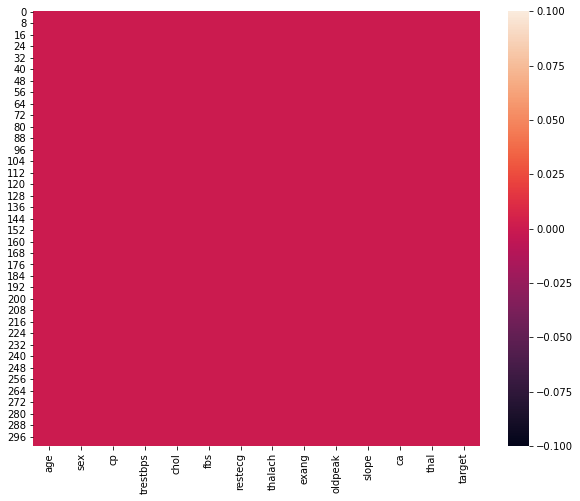

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(heart_disease_dataset.isnull())

In [10]:
heart_disease_dataset_cor = heart_disease_dataset.corr()

<AxesSubplot:>

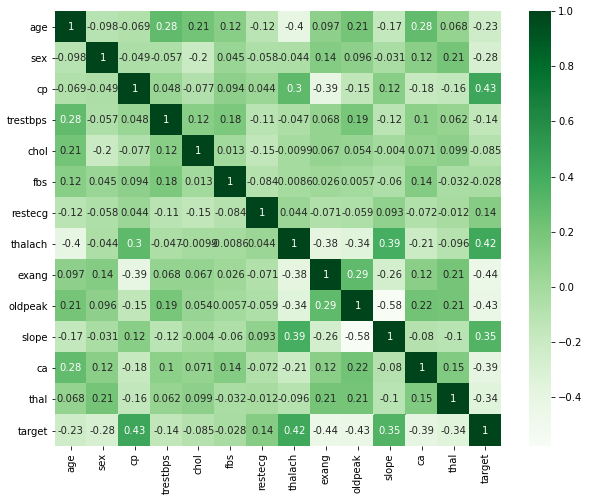

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(heart_disease_dataset_cor,cmap="Greens",annot = True)

### Model training and predicting

In [12]:
X = heart_disease_dataset.iloc[:,:-1].values
Y = heart_disease_dataset.iloc[:,-1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y ,test_size= 0.2, random_state= 1)

In [14]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (242, 13)
Shape of X_test:  (61, 13)
Shape of Y_train:  (242,)
Shape of Y_test:  (61,)


In [15]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

### Training the dataset using Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
heart_disease_model = RandomForestClassifier(random_state=1)

heart_disease_model.fit(X_train,Y_train)

heart_disease_model_pred = heart_disease_model.predict(X_test)

In [17]:
print(Y_test)

[0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1]


In [18]:
print(heart_disease_model_pred)

[0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1]


### Using confusion matrix

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, heart_disease_model_pred))
print('-----------------------------')
print(confusion_matrix(Y_test, heart_disease_model_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

-----------------------------
[[21  9]
 [ 3 28]]


In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(Y_test, heart_disease_model_pred)

0.8032786885245902